In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization, GRU, Bidirectional, Conv3D, MaxPooling3D, Flatten, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
import scipy
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam

2024-07-27 03:42:10.108079: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-27 03:42:10.193712: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-27 03:42:10.195194: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-27 03:42:11.408216: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
ue_df = pd.read_csv(r'/root/ghazi/Data/UEReports.csv')
ue_df

,timestamp,Viavi.UE.Name,Viavi.UE.Slice,Viavi.Cell.Name,Viavi.Cell.beam,Viavi.mMIMO.Type,Viavi.mMIMO.Group,Viavi.mMIMO.Beamforming,Viavi.UE.Rsrp,Viavi.UE.Rsrq,...,RRU.PrbUsedUl,TB.TotNbrUl,DRB.UECqiDl,DRB.UEThpDl,RRU.PrbUsedDl,TB.TotNbrDl,Viavi.CA.cells,Viavi.Geo.x,Viavi.Geo.y,Viavi.Geo.z
0,1721001600000,Indoor-1,eMBB,S1/N77/C2,1,SSB,1,Digital,-123.153442,-14.289001,...,0.0,0,0,0.000000,0.0,0,1,-84,-16,2
1,1721001600000,Indoor-2,eMBB,S2/N77/C1,1,SSB,1,Digital,-92.153442,-10.796079,...,0.0,0,0,0.000000,0.0,0,1,925,-14,12
2,1721001600000,UE-3,eMBB,S1/N77/C1,1,SSB,1,Digital,-95.153442,-10.800321,...,0.0,0,0,0.000000,0.0,0,1,39,173,2
3,1721001600000,UE-4,eMBB,S1/N77/C1,1,SSB,1,Digital,-100.153442,-10.818660,...,0.0,0,0,0.000000,0.0,0,1,189,-52,2
4,1721001600000,UE-5,eMBB,S2/N77/C1,1,SSB,1,Digital,-105.153442,-10.876151,...,0.0,0,0,0.000000,0.0,0,1,1039,173,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147195,1721260799000,UE-12,eMBB,S2/N77/C3,9,SSB,1,Digital,-70.153442,-10.791840,...,46.0,8142,15,0.045778,32.0,70639,1,1160,114,0
4147196,1721260799000,UE-13,eMBB,S2/N77/C3,9,SSB,1,Digital,-64.153442,-10.791820,...,45.0,6846,15,0.045778,32.0,59297,1,1140,149,0
4147197,1721260799000,UE-14,eMBB,S2/N77/C3,9,SSB,1,Digital,-99.153442,-10.813152,...,46.0,7270,13,0.039398,32.0,63156,1,1085,185,1
4147198,1721260799000,UE-15,eMBB,S2/N77/C3,9,SSB,1,Digital,-65.153442,-10.791821,...,45.0,6948,15,0.045778,32.0,61979,1,1145,148,0


In [3]:
ue_data = ue_df.copy()

In [4]:
ue_data = ue_data.drop(columns = ['Viavi.UE.Slice', 'Viavi.mMIMO.Type', 'Viavi.mMIMO.Group', 'Viavi.mMIMO.Beamforming', 'Viavi.UE.anomalies', 'Viavi.QoS.Priority', 'Viavi.QoS.5q', 
                                  'Viavi.CA.cells'])

In [5]:
ue_data['timestamp'] = pd.to_datetime(ue_data['timestamp'], unit='ms')
ue_data

,timestamp,Viavi.UE.Name,Viavi.Cell.Name,Viavi.Cell.beam,Viavi.UE.Rsrp,Viavi.UE.Rsrq,Viavi.UE.RsSinr,Viavi.UE.targetThroughputDl,Viavi.QoS.Score,DRB.UECqiUl,DRB.UEThpUl,RRU.PrbUsedUl,TB.TotNbrUl,DRB.UECqiDl,DRB.UEThpDl,RRU.PrbUsedDl,TB.TotNbrDl,Viavi.Geo.x,Viavi.Geo.y,Viavi.Geo.z
0,2024-07-15 00:00:00,Indoor-1,S1/N77/C2,1,-123.153442,-14.289001,-0.924652,0.001,100,0,0.000000,0.0,0,0,0.000000,0.0,0,-84,-16,2
1,2024-07-15 00:00:00,Indoor-2,S2/N77/C1,1,-92.153442,-10.796079,30.075348,0.001,100,0,0.000000,0.0,0,0,0.000000,0.0,0,925,-14,12
2,2024-07-15 00:00:00,UE-3,S1/N77/C1,1,-95.153442,-10.800321,27.075348,0.010,100,0,0.000000,0.0,0,0,0.000000,0.0,0,39,173,2
3,2024-07-15 00:00:00,UE-4,S1/N77/C1,1,-100.153442,-10.818660,22.075348,0.010,100,0,0.000000,0.0,0,0,0.000000,0.0,0,189,-52,2
4,2024-07-15 00:00:00,UE-5,S2/N77/C1,1,-105.153442,-10.876151,17.075348,0.010,100,0,0.000000,0.0,0,0,0.000000,0.0,0,1039,173,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147195,2024-07-17 23:59:59,UE-12,S2/N77/C3,9,-70.153442,-10.791840,52.075348,0.050,92,15,0.007322,46.0,8142,15,0.045778,32.0,70639,1160,114,0
4147196,2024-07-17 23:59:59,UE-13,S2/N77/C3,9,-64.153442,-10.791820,58.075348,0.050,92,15,0.007162,45.0,6846,15,0.045778,32.0,59297,1140,149,0
4147197,2024-07-17 23:59:59,UE-14,S2/N77/C3,9,-99.153442,-10.813152,23.075348,0.050,79,13,0.006299,46.0,7270,13,0.039398,32.0,63156,1085,185,1
4147198,2024-07-17 23:59:59,UE-15,S2/N77/C3,9,-65.153442,-10.791821,57.075348,0.050,92,15,0.007162,45.0,6948,15,0.045778,32.0,61979,1145,148,0


In [6]:
s1_data = ue_data[ue_data['Viavi.Cell.Name'].str.contains('S1')]
s1_data

,timestamp,Viavi.UE.Name,Viavi.Cell.Name,Viavi.Cell.beam,Viavi.UE.Rsrp,Viavi.UE.Rsrq,Viavi.UE.RsSinr,Viavi.UE.targetThroughputDl,Viavi.QoS.Score,DRB.UECqiUl,DRB.UEThpUl,RRU.PrbUsedUl,TB.TotNbrUl,DRB.UECqiDl,DRB.UEThpDl,RRU.PrbUsedDl,TB.TotNbrDl,Viavi.Geo.x,Viavi.Geo.y,Viavi.Geo.z
0,2024-07-15 00:00:00,Indoor-1,S1/N77/C2,1,-123.153442,-14.289001,-0.924652,0.001,100,0,0.000000,0.0,0,0,0.000000,0.0,0,-84,-16,2
2,2024-07-15 00:00:00,UE-3,S1/N77/C1,1,-95.153442,-10.800321,27.075348,0.010,100,0,0.000000,0.0,0,0,0.000000,0.0,0,39,173,2
3,2024-07-15 00:00:00,UE-4,S1/N77/C1,1,-100.153442,-10.818660,22.075348,0.010,100,0,0.000000,0.0,0,0,0.000000,0.0,0,189,-52,2
6,2024-07-15 00:00:00,UE-7,S1/N77/C1,1,-95.153442,-10.800321,27.075348,0.010,100,0,0.000000,0.0,0,0,0.000000,0.0,0,39,173,2
7,2024-07-15 00:00:00,UE-8,S1/N77/C1,1,-106.153442,-10.897724,16.075348,0.010,100,0,0.000000,0.0,0,0,0.000000,0.0,0,73,164,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147190,2024-07-17 23:59:59,UE-7,S1/N77/C2,3,-66.153442,-10.791823,56.075348,0.050,92,15,0.021805,137.0,8076,15,0.045778,32.0,71079,140,54,0
4147191,2024-07-17 23:59:59,UE-8,S1/N77/C3,9,-59.153439,-10.791815,63.075348,0.050,92,15,0.008752,55.0,6916,15,0.045778,32.0,61051,100,149,0
4147192,2024-07-17 23:59:59,UE-9,S1/N77/C3,9,-95.153442,-10.800321,27.075348,0.050,92,15,0.008594,54.0,6992,15,0.045778,32.0,61498,89,181,1
4147193,2024-07-17 23:59:59,UE-10,S1/N77/C3,9,-69.153442,-10.791834,53.075348,0.050,92,15,0.008752,55.0,7004,15,0.045778,32.0,62861,105,145,0


In [7]:
s1_data = s1_data.drop(columns = ['Viavi.Cell.Name'])

In [8]:
ue_list = s1_data['Viavi.UE.Name'].unique()

In [10]:
# s1_data['Viavi.UE.Name'] = LabelEncoder().fit_transform(s1_data['Viavi.UE.Name'])

In [9]:
s1_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2073600 entries, 0 to 4147194
Data columns (total 19 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   timestamp                    datetime64[ns]
 1   Viavi.UE.Name                object        
 2   Viavi.Cell.beam              int64         
 3   Viavi.UE.Rsrp                float64       
 4   Viavi.UE.Rsrq                float64       
 5   Viavi.UE.RsSinr              float64       
 6   Viavi.UE.targetThroughputDl  float64       
 7   Viavi.QoS.Score              int64         
 8   DRB.UECqiUl                  int64         
 9   DRB.UEThpUl                  float64       
 10  RRU.PrbUsedUl                float64       
 11  TB.TotNbrUl                  int64         
 12  DRB.UECqiDl                  int64         
 13  DRB.UEThpDl                  float64       
 14  RRU.PrbUsedDl                float64       
 15  TB.TotNbrDl                  int64         
 16  Viavi

In [10]:
s1_data

,timestamp,Viavi.UE.Name,Viavi.Cell.beam,Viavi.UE.Rsrp,Viavi.UE.Rsrq,Viavi.UE.RsSinr,Viavi.UE.targetThroughputDl,Viavi.QoS.Score,DRB.UECqiUl,DRB.UEThpUl,RRU.PrbUsedUl,TB.TotNbrUl,DRB.UECqiDl,DRB.UEThpDl,RRU.PrbUsedDl,TB.TotNbrDl,Viavi.Geo.x,Viavi.Geo.y,Viavi.Geo.z
0,2024-07-15 00:00:00,Indoor-1,1,-123.153442,-14.289001,-0.924652,0.001,100,0,0.000000,0.0,0,0,0.000000,0.0,0,-84,-16,2
2,2024-07-15 00:00:00,UE-3,1,-95.153442,-10.800321,27.075348,0.010,100,0,0.000000,0.0,0,0,0.000000,0.0,0,39,173,2
3,2024-07-15 00:00:00,UE-4,1,-100.153442,-10.818660,22.075348,0.010,100,0,0.000000,0.0,0,0,0.000000,0.0,0,189,-52,2
6,2024-07-15 00:00:00,UE-7,1,-95.153442,-10.800321,27.075348,0.010,100,0,0.000000,0.0,0,0,0.000000,0.0,0,39,173,2
7,2024-07-15 00:00:00,UE-8,1,-106.153442,-10.897724,16.075348,0.010,100,0,0.000000,0.0,0,0,0.000000,0.0,0,73,164,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147190,2024-07-17 23:59:59,UE-7,3,-66.153442,-10.791823,56.075348,0.050,92,15,0.021805,137.0,8076,15,0.045778,32.0,71079,140,54,0
4147191,2024-07-17 23:59:59,UE-8,9,-59.153439,-10.791815,63.075348,0.050,92,15,0.008752,55.0,6916,15,0.045778,32.0,61051,100,149,0
4147192,2024-07-17 23:59:59,UE-9,9,-95.153442,-10.800321,27.075348,0.050,92,15,0.008594,54.0,6992,15,0.045778,32.0,61498,89,181,1
4147193,2024-07-17 23:59:59,UE-10,9,-69.153442,-10.791834,53.075348,0.050,92,15,0.008752,55.0,7004,15,0.045778,32.0,62861,105,145,0


In [45]:
# corr_matrix = s1_data.corr()

# # Plot heatmap
# plt.figure(figsize=(15, 12))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()

In [11]:
s1_data_matter = s1_data[['timestamp', 'DRB.UEThpUl', 'RRU.PrbUsedUl', 'Viavi.UE.RsSinr', 'Viavi.UE.Name', 'Viavi.Cell.beam', 'Viavi.Geo.x', 'Viavi.Geo.y', 'Viavi.Geo.z']]

In [12]:
s1_data_matter

,timestamp,DRB.UEThpUl,RRU.PrbUsedUl,Viavi.UE.RsSinr,Viavi.UE.Name,Viavi.Cell.beam,Viavi.Geo.x,Viavi.Geo.y,Viavi.Geo.z
0,2024-07-15 00:00:00,0.000000,0.0,-0.924652,Indoor-1,1,-84,-16,2
2,2024-07-15 00:00:00,0.000000,0.0,27.075348,UE-3,1,39,173,2
3,2024-07-15 00:00:00,0.000000,0.0,22.075348,UE-4,1,189,-52,2
6,2024-07-15 00:00:00,0.000000,0.0,27.075348,UE-7,1,39,173,2
7,2024-07-15 00:00:00,0.000000,0.0,16.075348,UE-8,1,73,164,2
...,...,...,...,...,...,...,...,...,...
4147190,2024-07-17 23:59:59,0.021805,137.0,56.075348,UE-7,3,140,54,0
4147191,2024-07-17 23:59:59,0.008752,55.0,63.075348,UE-8,9,100,149,0
4147192,2024-07-17 23:59:59,0.008594,54.0,27.075348,UE-9,9,89,181,1
4147193,2024-07-17 23:59:59,0.008752,55.0,53.075348,UE-10,9,105,145,0


In [ ]:
s1_data_matter.to_csv(r'D:\TEEP\Onsite\internship\Code\Data\S1_Matter.csv', index=False)

In [86]:
def create_sequences(data, target_data, sequence_length=10):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        target = target_data[i + sequence_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

def normalization(data):
    mean = data.mean()
    std = data.std()

    normalize = (data - mean) / std
    return normalize

def inverse_normalization(data, original_data):
    mean = original_data.mean()
    std = original_data.std()

    return (data * std) + mean

def plot_predictions(df_predictions, user_id):
    df_user = df_predictions
    plt.figure(figsize=(12, 8))
    
    plt.plot(df_user.index, df_user['actual_x'], label='Actual x', color='blue')
    plt.plot(df_user.index, df_user['predicted_x'], label='Predicted x', color='red', linestyle='--')
    
    plt.plot(df_user.index, df_user['actual_y'], label='Actual y', color='green')
    plt.plot(df_user.index, df_user['predicted_y'], label='Predicted y', color='orange', linestyle='--')
    
    plt.plot(df_user.index, df_user['actual_z'], label='Actual z', color='purple')
    plt.plot(df_user.index, df_user['predicted_z'], label='Predicted z', color='brown', linestyle='--')
    
    plt.xlabel('Index')
    plt.ylabel('Location Coordinates')
    plt.title(f'Actual vs Predicted Locations for User {user_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

def display_predictions(predictions, actual_values):
    df = pd.DataFrame({
        'predicted_x': predictions[:, 0],
        'predicted_y': predictions[:, 1],
        'predicted_z': predictions[:, 2],
        'actual_x': actual_values[:, 0],
        'actual_y': actual_values[:, 1],
        'actual_z': actual_values[:, 2]
    })
    return df

In [14]:
ue_list

array(['Indoor-1', 'UE-3', 'UE-4', 'UE-7', 'UE-8', 'UE-9', 'UE-10',
       'UE-11'], dtype=object)

In [15]:
s1_ue_7 = s1_data_matter[s1_data_matter['Viavi.UE.Name'] == ue_list[3]]
s1_ue_7

,timestamp,DRB.UEThpUl,RRU.PrbUsedUl,Viavi.UE.RsSinr,Viavi.UE.Name,Viavi.Cell.beam,Viavi.Geo.x,Viavi.Geo.y,Viavi.Geo.z
6,2024-07-15 00:00:00,0.000000,0.0,27.075348,UE-7,1,39,173,2
22,2024-07-15 00:00:01,0.003436,39.0,56.075348,UE-7,1,39,172,1
38,2024-07-15 00:00:02,0.003816,46.0,35.075348,UE-7,1,39,172,1
54,2024-07-15 00:00:03,0.007322,46.0,35.075348,UE-7,1,39,172,1
70,2024-07-15 00:00:04,0.007322,46.0,35.075348,UE-7,9,39,172,1
...,...,...,...,...,...,...,...,...,...
4147126,2024-07-17 23:59:55,0.021805,137.0,56.075348,UE-7,3,140,54,0
4147142,2024-07-17 23:59:56,0.021805,137.0,56.075348,UE-7,3,140,54,0
4147158,2024-07-17 23:59:57,0.021805,137.0,56.075348,UE-7,3,140,54,0
4147174,2024-07-17 23:59:58,0.021805,137.0,56.075348,UE-7,3,140,54,0


In [16]:
train_df = s1_ue_7[s1_ue_7['timestamp'] < '2024-07-17 00:00:00'].drop(columns = ['timestamp', 'Viavi.UE.Name'])
test_time_df = s1_ue_7[s1_ue_7['timestamp'].dt.date == pd.to_datetime('2024-07-17').date()].set_index('timestamp').between_time('14:00', '15:00').reset_index().drop(columns = ['timestamp', 'Viavi.UE.Name'])

In [107]:
train_df_scaled = normalization(train_df)
# test_df_scaled = normalization(test_time_df)

In [108]:
feature_columns = ['DRB.UEThpUl', 'RRU.PrbUsedUl', 'Viavi.UE.RsSinr', 'Viavi.Cell.beam', 'Viavi.Geo.x', 'Viavi.Geo.y', 'Viavi.Geo.z']
seq_length = 10
x_train, y_train = create_sequences(train_df_scaled[feature_columns].values, train_df_scaled[['Viavi.Geo.x', 'Viavi.Geo.y', 'Viavi.Geo.z']].values, seq_length)
x_test, y_test = create_sequences(test_time_df[feature_columns].values, test_time_df[['Viavi.Geo.x', 'Viavi.Geo.y', 'Viavi.Geo.z']].values, seq_length)

In [109]:
x_test_scaled = normalization(x_test)
# y_test_scaled = normalization(y_test)

In [94]:
x_train.shape, y_train.shape

((172790, 10, 7), (172790, 3))

In [82]:
x_test.shape, y_test.shape

((3591, 10, 7), (3591, 3))

In [21]:
# feature_names = ['DRB.UEThpUl', 'RRU.PrbUsedUl', 'Viavi.UE.RsSinr',
#                  'Viavi.Cell.beam']
# output_names = ['Viavi.Geo.x', 'Viavi.Geo.y', 'Viavi.Geo.z']

# num_train_samples = 172790

# # Generate new dummy data with correct feature names
# x_train_csv = pd.DataFrame(
#     data=[[i]*len(feature_names) for i in range(num_train_samples*seq_length)],
#     columns=feature_names
# )
# y_train_csv = pd.DataFrame(
#     data=[[i]*len(output_names) for i in range(num_train_samples*seq_length)],
#     columns=output_names
# )
# x_test_csv = pd.DataFrame(
#     data=[[i]*len(feature_names) for i in range(num_train_samples*seq_length)],
#     columns=feature_names
# )
# y_test_csv = pd.DataFrame(
#     data=[[i]*len(output_names) for i in range(num_train_samples*seq_length)],
#     columns=output_names
# )

# x_train_csv.to_csv("/root/ghazi/Data/X_train.csv", index = False)
# y_train_csv.to_csv("/root/ghazi/Data/y_train.csv", index = False)
# x_test_csv.to_csv("/root/ghazi/Data/X_test.csv", index = False)
# y_test_csv.to_csv("/root/ghazi/Data/y_test.csv", index = False)

In [100]:
X_train_reshaped = x_train.reshape((x_train.shape[0], seq_length, 7))
X_test_reshaped = x_test.reshape((x_test.shape[0], seq_length, 7))

In [45]:
# # Calculate the correct number of samples
# timesteps = 10
# num_samples = x_train.shape[0] // timesteps
# num_features = x_train.shape[1]

# # Ensure the reshaping will match the total number of elements
# correct_num_elements = num_samples * timesteps * 1 * 1 * num_features

# if correct_num_elements == num_elements_x_train and correct_num_elements == num_elements_x_test:
#     # Reshape the input data to 5D [samples, timesteps, height, width, channels]
#     x_train_reshaped = x_train.reshape((num_samples, timesteps, 1, 1, num_features))
#     x_test_reshaped = x_test.reshape((num_samples, timesteps, 1, 1, num_features))

#     # Reshape the target data to 3D [samples, timesteps, features]
#     y_train_reshaped = y_train.reshape((num_samples, timesteps, y_train.shape[1]))
#     y_test_reshaped = y_test.reshape((num_samples, timesteps, y_test.shape[1]))

#     print(f"Shapes after reshaping: X_train: {x_train_reshaped.shape}, y_train: {y_train_reshaped.shape}, X_test: {x_test_reshaped.shape}, y_test: {y_test_reshaped.shape}")
# else:
#     print("There is a discrepancy in the number of elements.")

In [63]:
model = Sequential()

model.add(LSTM(120, return_sequences=True, input_shape=(seq_length, 7)))
model.add(Dropout(0.3))
model.add(LSTM(120, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(3), activation = 'linier')

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size = 64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
2160/2160 [==============================] - 131s 58ms/step - loss: 0.0335 - val_loss: 0.0076
Epoch 2/10
2160/2160 [==============================] - 124s 57ms/step - loss: 0.0184 - val_loss: 0.0053
Epoch 3/10
2160/2160 [==============================] - 124s 57ms/step - loss: 0.0169 - val_loss: 0.0045
Epoch 4/10
2160/2160 [==============================] - 124s 57ms/step - loss: 0.0157 - val_loss: 0.0038
Epoch 5/10
2160/2160 [==============================] - 124s 57ms/step - loss: 0.0151 - val_loss: 0.0034
Epoch 6/10
2160/2160 [==============================] - 124s 57ms/step - loss: 0.0149 - val_loss: 0.0043
Epoch 7/10
2160/2160 [==============================] - 124s 57ms/step - loss: 0.0143 - val_loss: 0.0030
Epoch 8/10
2160/2160 [==============================] - 124s 57ms/step - loss: 0.0142 - val_loss: 0.0029
Epoch 9/10
2160/2160 [==============================] - 124s 57ms/step - loss: 0.0139 - val_loss: 0.0028
Epoch 10/10
2160/2160 [==============================] 

In [101]:
predictions = model.predict(X_test_reshaped)

  1/113 [..............................] - ETA: 4s

113/113 [==============================] - 2s 16ms/step


In [110]:
predictions_inverse = inverse_normalization(predictions, x_test[:, :, -3:])

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, predictions_inverse))
print('Test RMSE: ', rmse)

Test RMSE:  76.1480811573309


In [112]:
# user_ids = test_time_df['Viavi.UE.Name'].values[seq_length:]

# Display the predictions
df_predictions = display_predictions(predictions_inverse, y_test)
print(df_predictions.head())

   predicted_x  predicted_y  predicted_z  actual_x  actual_y  actual_z
0   -55.872246   121.947098   192.980560       -26       152         1
1   -55.915077   121.904884   192.964279       -26       152         1
2   -55.941063   121.886032   192.955139       -26       152         1
3   -55.941063   121.886032   192.955139       -26       152         1
4   -55.941063   121.886032   192.955139       -26       152         1


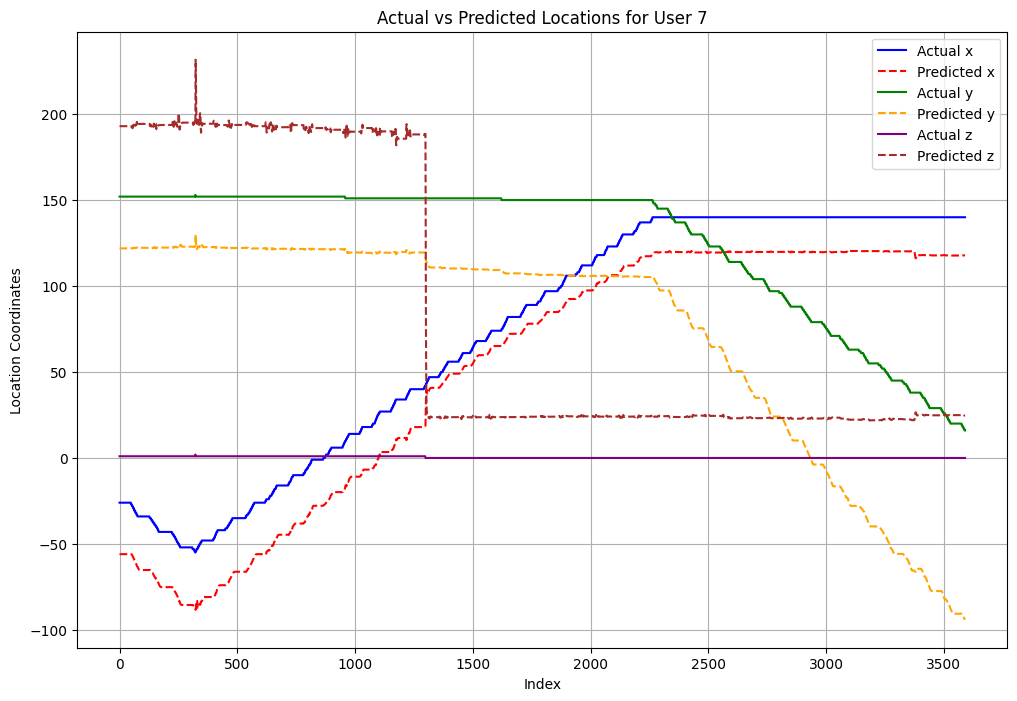

In [113]:
plot_predictions(df_predictions, 7)